In [1]:
import os, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
TABLES_DIRECTORY = "../../Data/giant_new_tables"

In [3]:
# Initialize an empty list to hold the data
# completed_hup_ids = [160, 172, 141, 145, 157, 161, 138, 142, 151, 171, 175, 187]
completed_hup_ids = [
    160,
    172,
    # 141, # not enough time before first seizure
    145,
    138,
    142,
    151,
    187,
    180,
    184,
    # 192, # incomplete data
    196,  # not enough time before first seizure
    204,  # not enough time before first seizure
    # 165, # incomplete data
    169,  # not enough time after the last seizure
    173,
    150,  # not enough time before first seizure
    # 154, # incomplete data
    # 158, # incomplete data
    # 207,  # not enough time before first seizure
    223,
    # 192,  ## Monday, August 21, 2023 additions this line and below # incomplete data
    196,  # not enough time before first seizure
    204,  # not enough time before first seizure
    177,
    185,
    189,  # not enough time before first seizure
    # 205,  # not enough time before first seizure
    166,
    170,  # not enough time before first seizure
    174,  # not enough time before first seizure
]
# Sort completed_hup_ids in ascending order
completed_hup_ids.sort()

In [4]:
for patient_hup_id in completed_hup_ids:
    # Read in the giant table for this patient
    hourly_patient_features_df = pd.read_csv(
        os.path.join(TABLES_DIRECTORY, f"HUP_{str(patient_hup_id)}.csv")
    )

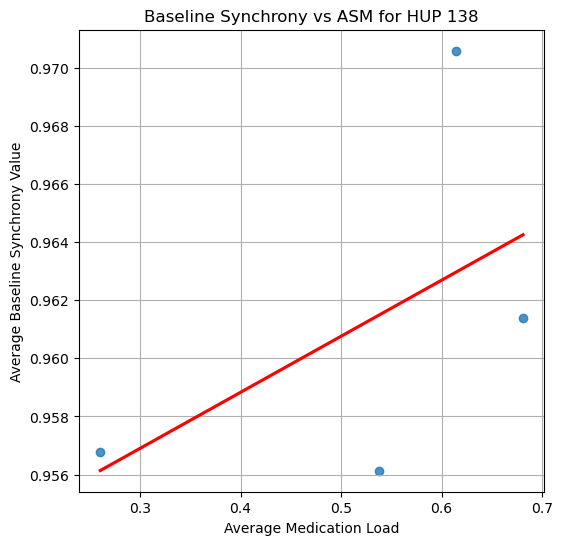

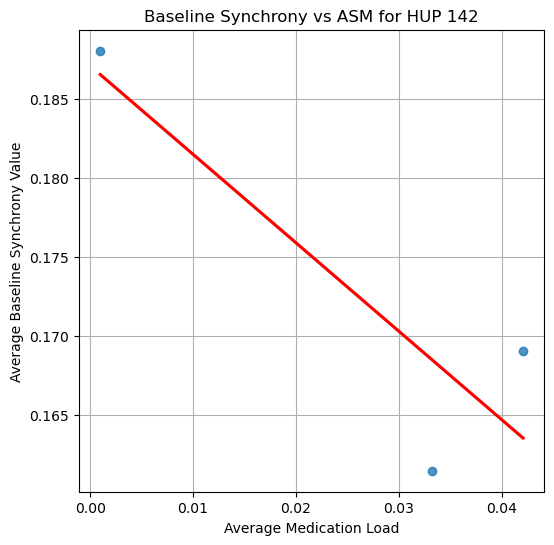

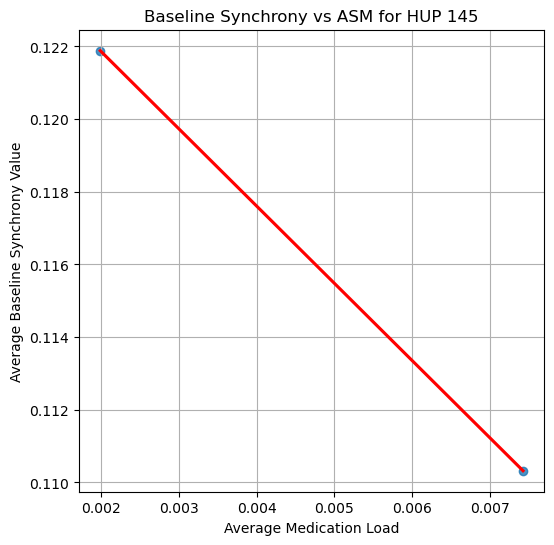

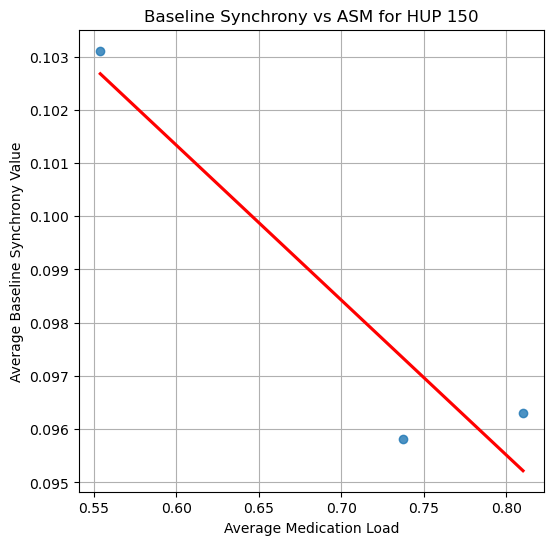

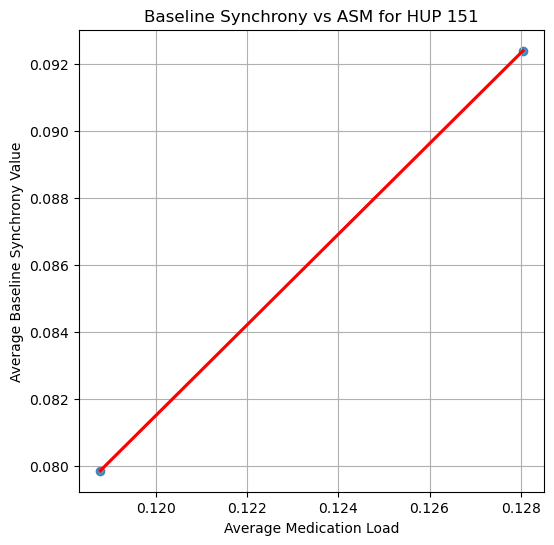

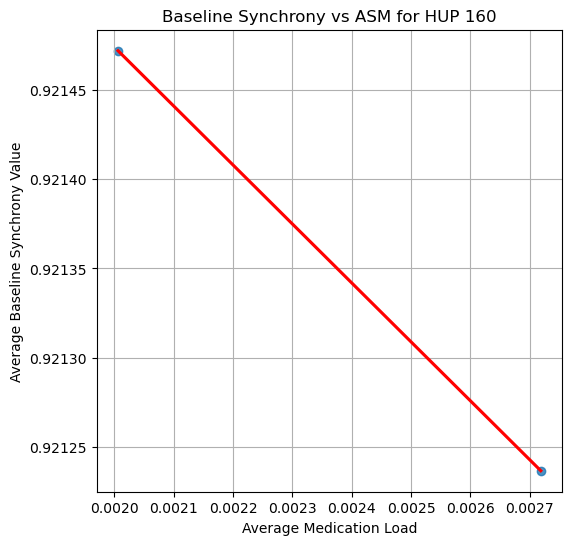

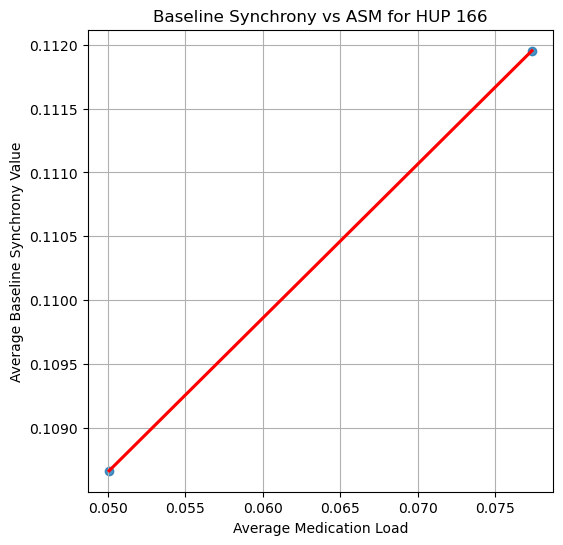

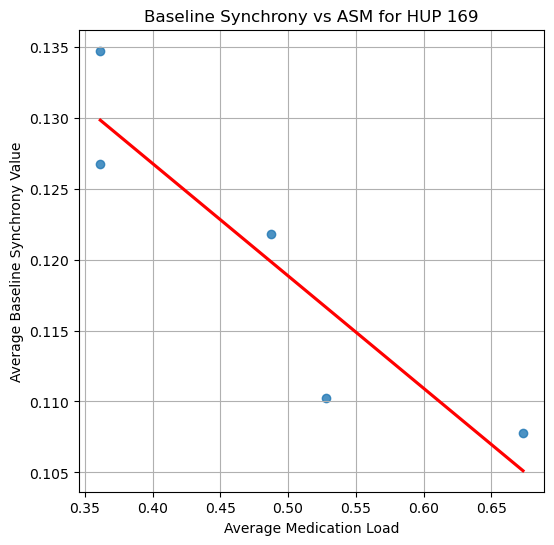

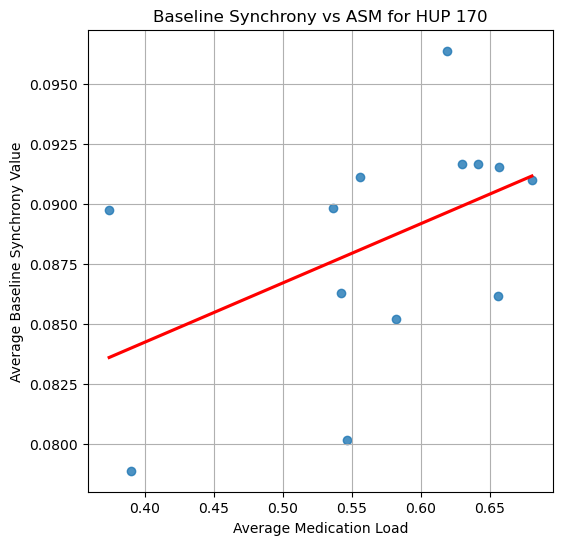

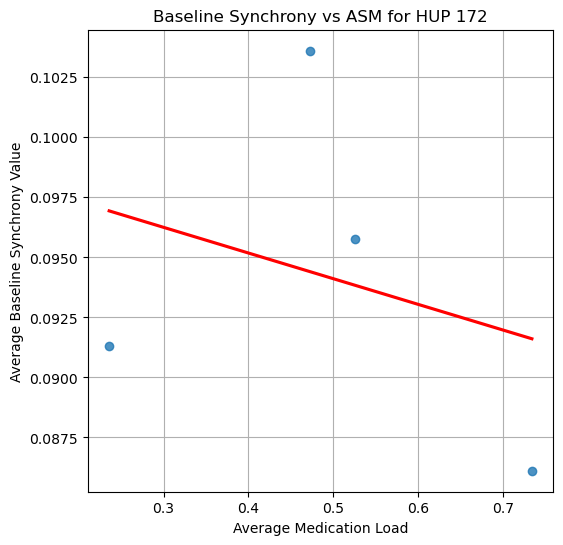

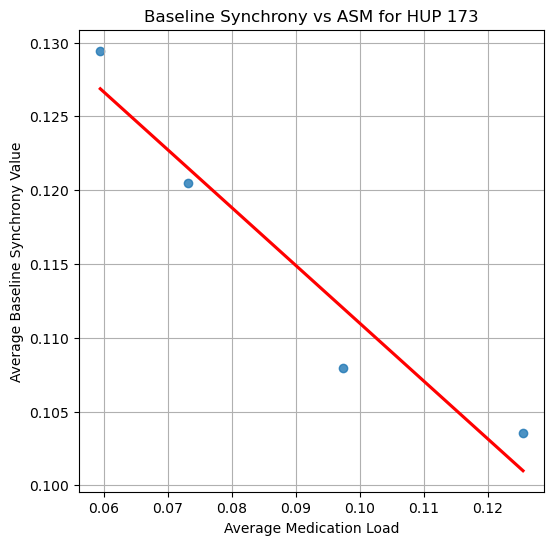

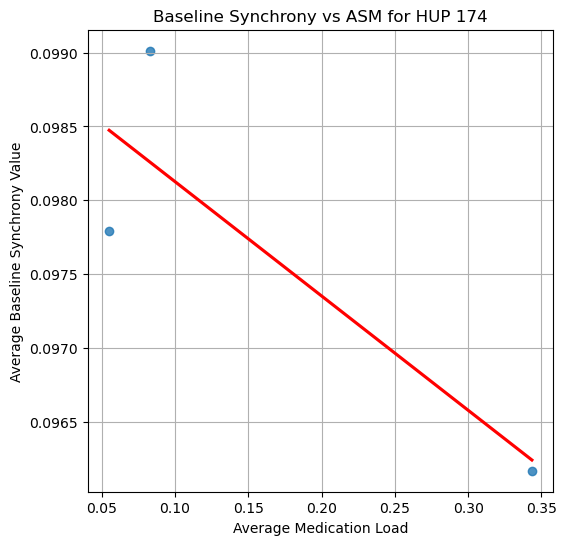

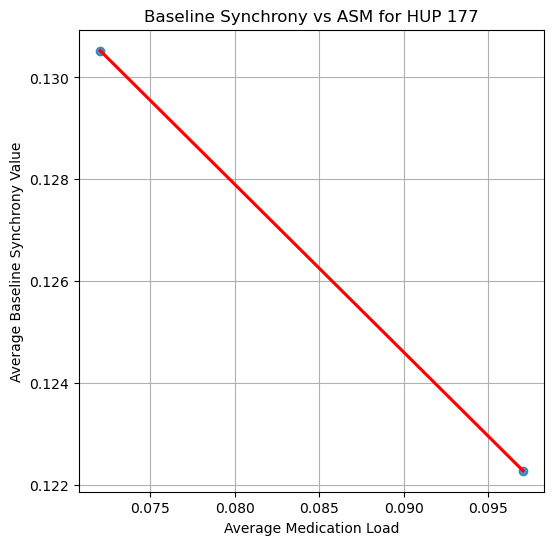

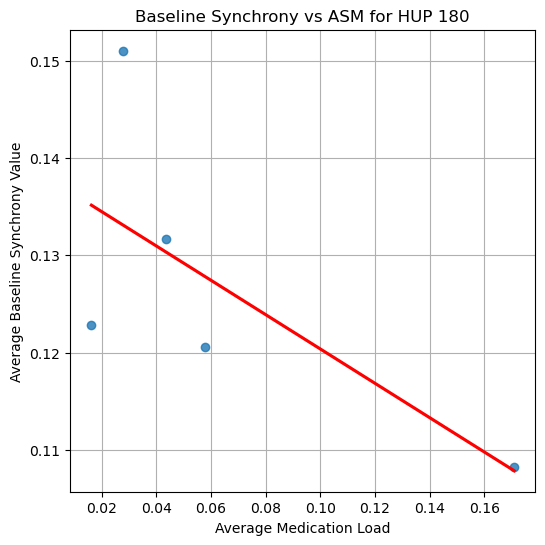

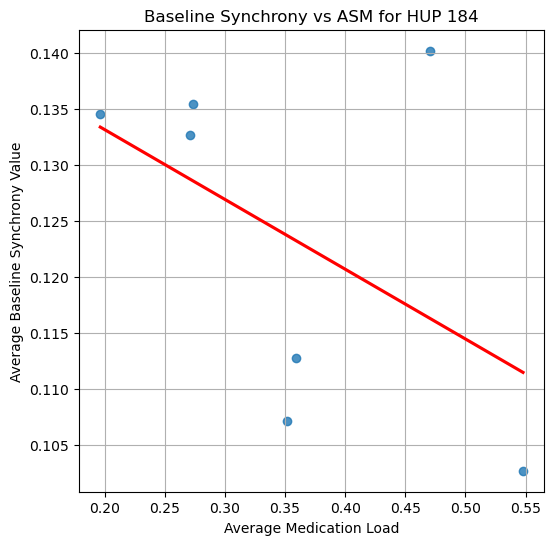

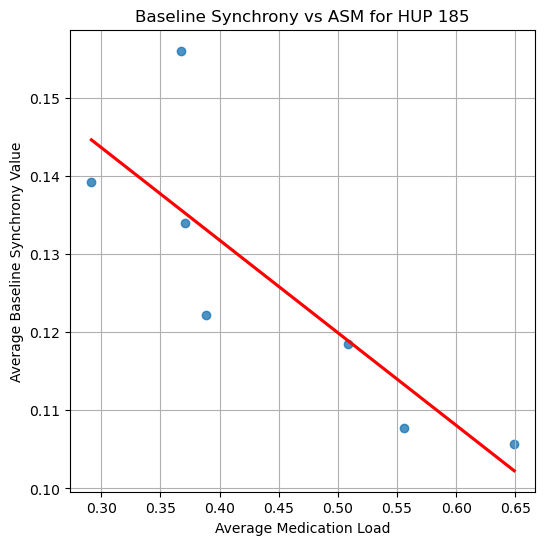

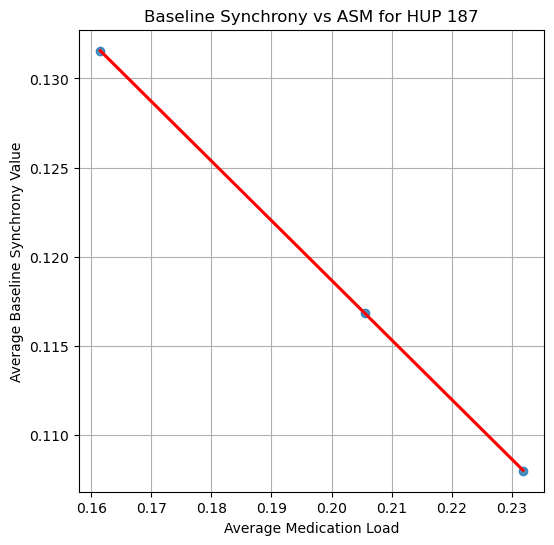

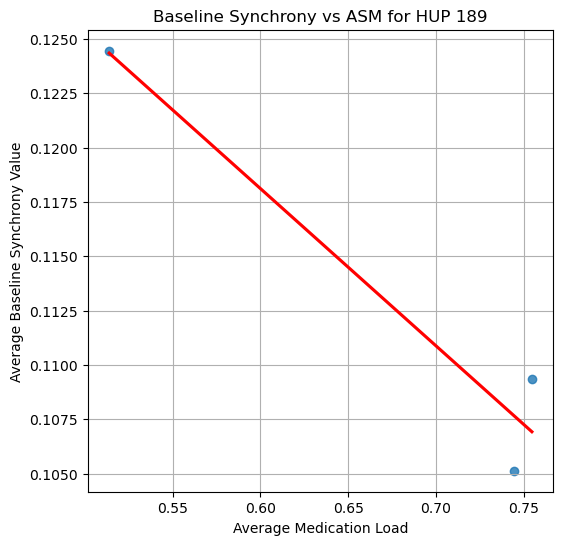

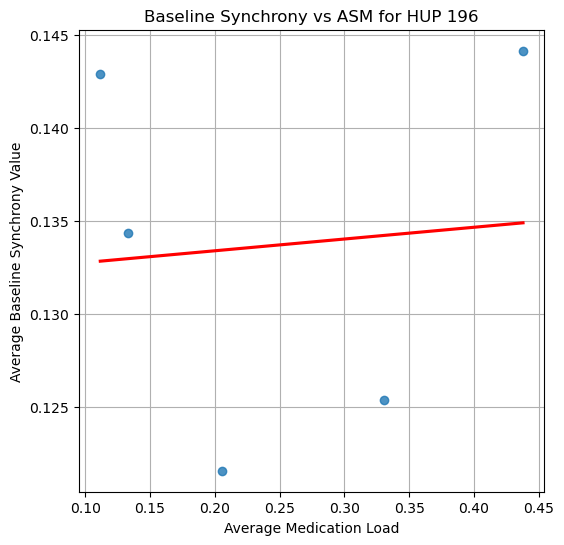

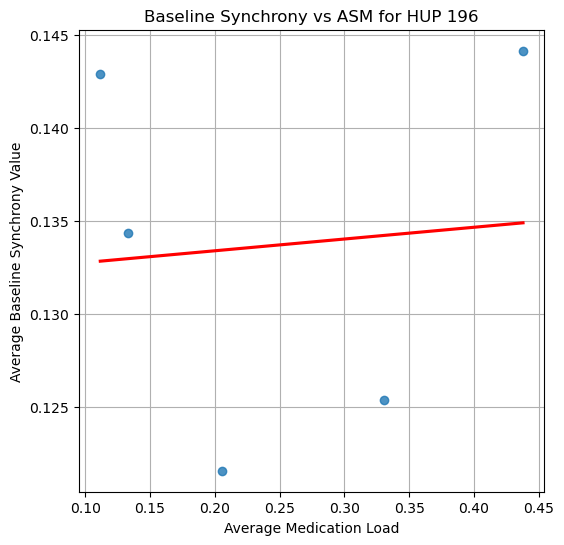

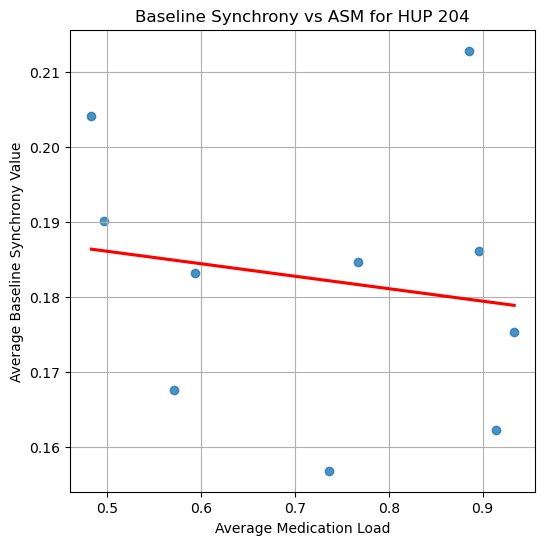

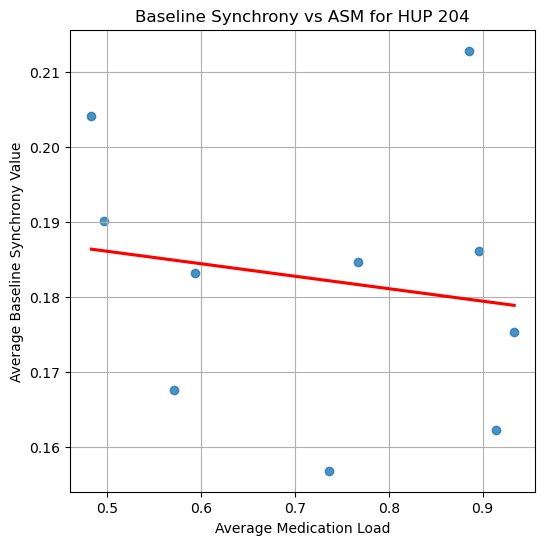

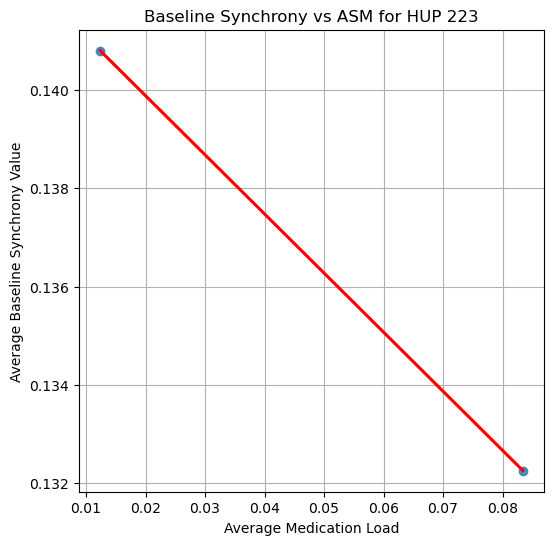

In [5]:
for patient_hup_id in completed_hup_ids:
    # Read the dataframe
    hourly_patient_features_df = pd.read_csv(
        os.path.join(TABLES_DIRECTORY, f"HUP_{str(patient_hup_id)}.csv")
    )

    # Extract indices of rows where there was a seizure
    seizure_indices = hourly_patient_features_df[
        hourly_patient_features_df["had_seizure"] >= 1
    ].index

    # Filter out seizures that occurred within 2 hours of the previous seizure
    valid_seizure_indices = [
        idx
        for i, idx in enumerate(seizure_indices)
        if i == 0 or (seizure_indices[i] - seizure_indices[i - 1]) >= 120
    ]

    # Initialize lists to store the average synchrony and medication load values for this patient
    avg_synchronies = []
    avg_med_loads = []

    for idx in valid_seizure_indices:
        seizure_time = hourly_patient_features_df.loc[idx, "emu_minute"]

        # Get the 2-hour window before the seizure
        window = hourly_patient_features_df[
            (hourly_patient_features_df["emu_minute"] >= seizure_time - 120)
            & (hourly_patient_features_df["emu_minute"] < seizure_time)
        ]

        # Calculate the average synchrony and medication load for the 2-hour window
        avg_synchrony = np.nanmean(window["synchrony_broadband"])
        avg_med_load = np.nanmean(window["med_sum_no_lorazepam_raw"])

        avg_synchronies.append(avg_synchrony)
        avg_med_loads.append(avg_med_load)

    # Plot the scatter plot for this patient if there are valid seizures
    if avg_med_loads and avg_synchronies:
        plt.figure(figsize=(6, 6))
        sns.regplot(
            x=avg_med_loads,
            y=avg_synchronies,
            scatter=True,
            line_kws={"color": "red"},
            ci=None,
        )
        plt.xlabel("Average Medication Load")
        plt.ylabel("Average Baseline Synchrony Value")
        plt.title(f"Baseline Synchrony vs ASM for HUP {patient_hup_id}")
        plt.grid(True)
        plt.show()